In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
start = '2012-01-01'
end = '2022-12-31'
stock = 'GOOG'

data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
data.reset_index(inplace=True)

In [6]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.495001,16.562924,16.171749,16.185880,147611217
1,2012-01-04,16.566147,16.614982,16.376262,16.485582,114989399
2,2012-01-05,16.336349,16.459304,16.267435,16.413692,131808205
3,2012-01-06,16.113495,16.360891,16.107792,16.339819,108119746
4,2012-01-09,15.430305,16.038633,15.399813,16.026237,233776981
...,...,...,...,...,...,...
2763,2022-12-23,89.386627,89.675261,87.206956,87.206956,17815000
2764,2022-12-27,87.515495,89.078094,87.122361,88.888987,15470900
2765,2022-12-28,86.052414,88.102700,85.962842,87.087512,17879600


In [7]:
moving_avg_100 = data.Close.rolling(100).mean()

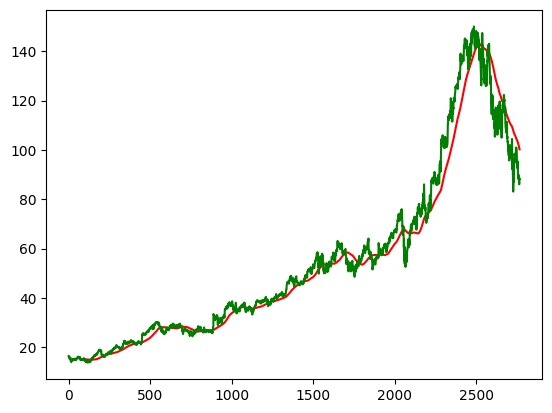

In [8]:
plt.Figure(figsize=(8, 6))
plt.plot(moving_avg_100, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [9]:
moving_avg_200 = data.Close.rolling(200).mean()

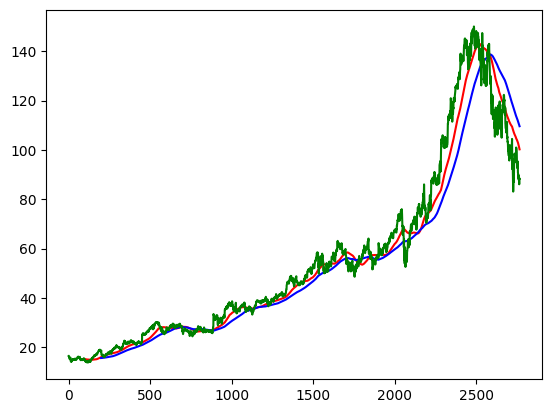

In [12]:
plt.Figure(figsize=(8, 6))
plt.plot(moving_avg_100, 'r')
plt.plot(moving_avg_200, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [13]:
data.dropna(inplace=True)

In [14]:
train_data = data.Close[0 : int(len(data)*0.8)]
test_data = data.Close[int(len(data)*0.8) : len(data)]

In [18]:
train_data.shape[0], test_data.shape[0]

(2214, 554)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [21]:
train_data_scale = scaler.fit_transform(train_data)

In [25]:
x, y = [], []

for i in range(100, train_data_scale.shape[0]):
    x.append(train_data_scale[i-100: i])
    y.append(train_data_scale[i, 0])

In [26]:
x, y = np.array(x), np.array(y)

In [27]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [28]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu',  return_sequences= True, input_shape = ((x.shape[1], 1))))
model.add(Dropout(0.2))
model.add(LSTM(units= 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units= 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units= 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 158ms/step - loss: 0.0672
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - loss: 0.0075
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 169ms/step - loss: 0.0067
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - loss: 0.0055
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 172ms/step - loss: 0.0047
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - loss: 0.0050
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 171ms/step - loss: 0.0039
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 150ms/step - loss: 0.0045
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - loss: 0.0046
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - loss: 0.0048
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 172ms/step - loss: 0.0035
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - loss: 0.0038
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - loss: 0.0038
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - loss: 0.0031
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [32]:
past_100_days = train_data.tail(100)

In [33]:
test_data = pd.concat([past_100_days, test_data], ignore_index=True)

In [34]:
test_data

Ticker,GOOG
0,71.109192
1,71.253510
2,71.621765
3,71.480438
4,70.276138
...,...
649,89.386627
650,87.515495
651,86.052414
652,88.530678


In [35]:
test_data_scale = scaler.fit_transform(test_data)

In [38]:
x, y = [], []
for i in range(100, test_data_scale.shape[0]):
    x.append(test_data_scale[i-100: i])
    y.append(test_data_scale[i, 0])

x, y = np.array(x), np.array(y)

In [39]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step


In [44]:
scale = 1/scaler.scale_

In [45]:
y_predict = y_predict*scale

In [46]:
y = y*scale

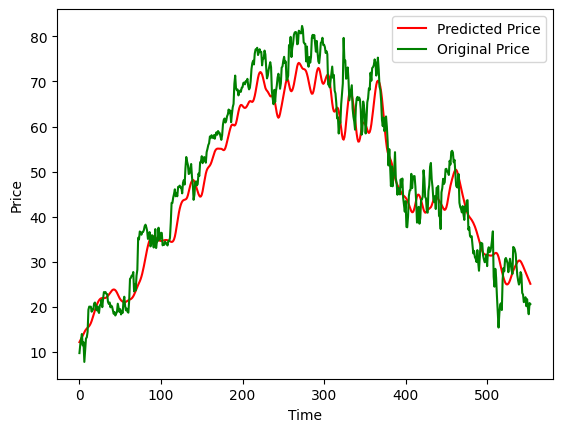

In [48]:
plt.Figure(figsize=(10, 8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [49]:
model.save('Stock_Price_Predictor.keras')